<a href="https://colab.research.google.com/github/jjlopezre/SenalesSistemas/blob/master/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 3 Señales y Sistemas
Juan José López Rendón 817533

#2. Modelado y simulación de sistemas en el tiempo
2.1 Respuesta al impulso y respuesta al escalón.

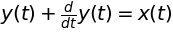

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)
ode

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


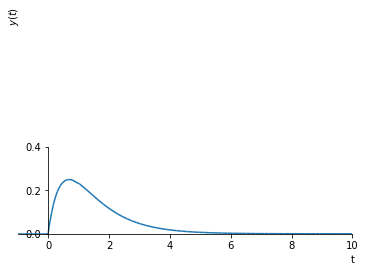

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');


In [ ]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


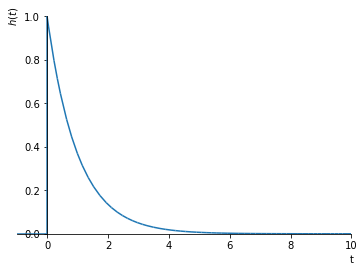

In [ ]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

In [ ]:
tau = sym.symbols('tau', real=True)
y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t),1).subs(t,t-tau), (tau, 0, t))
y2

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


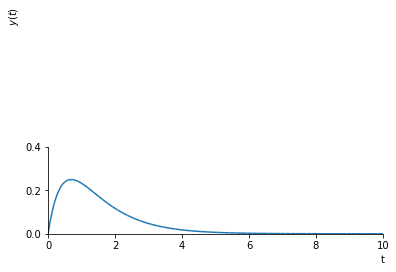

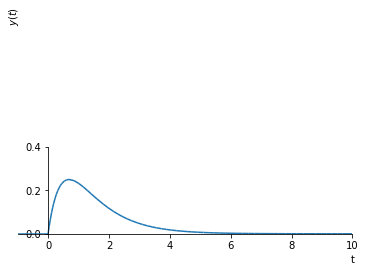

In [ ]:
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

#2.3 Red eléctrica y péndulo

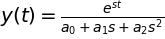

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2' : 0})



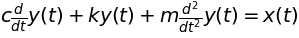

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

In [ ]:
mck = {m: 0.1, c: sym.Rational('.5'), k: sym.Rational('2.5')}
mck

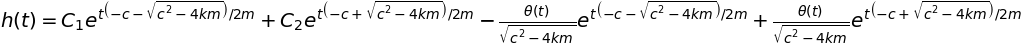

In [ ]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

In [ ]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

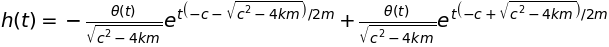

In [ ]:
h = solution_h.subs(integration_constants)
h

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


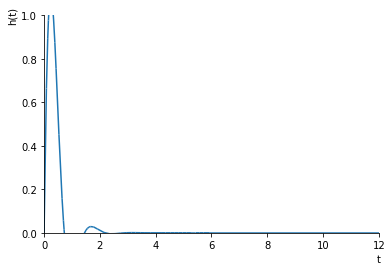

In [ ]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

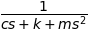

In [ ]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

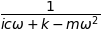

In [ ]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


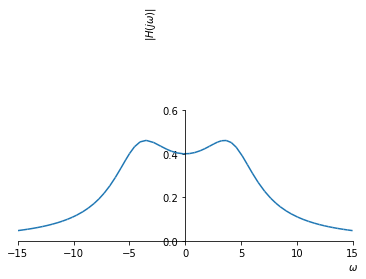

In [ ]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

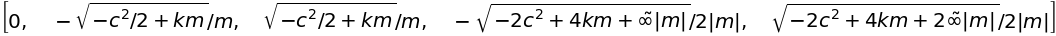

In [ ]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

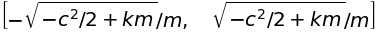

In [ ]:

w0 = extrema[1:3]
w0

In [ ]:

[w00.subs(mck) for w00 in w0]

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


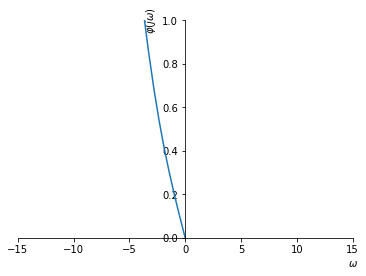

In [ ]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

#Pendulo 

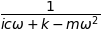

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode
s = sym.symbols('s')
H = sym.Function('H')(s)
H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
w = sym.symbols('omega', real=True)
Hjw = H.subs(s, sym.I * w)
Hjw


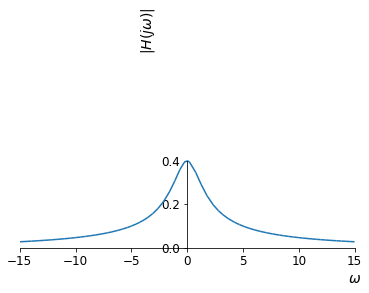

In [ ]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

In [ ]:

mck = {m: 0.1, c: sym.Rational('2'), k: sym.Rational('2.5')}

In [ ]:
import numpy as np

r= 1.2
Fo= m*r*w**2
fourier= np.exp(1j*w*t)*Hjw
y= Fo*np.fft.fft(fourier)
y

TypeError: ignored

#3.4 
Para las funciones de transferencia encontradas en el punto
anterior, encuentre la expresi´on de la salida en el tiempo, en
funci´on de R, L, C, y las condiciones iniciales, para las siguientes
entradas: i) impulso, ii) escalon unitario, y iv) rampa.
Compruebe los resultados en simulaci´on sobre Python
(utililzando sympy) y grafique la se˜nal de salida para cada
caso.

#Circuito RLC en serie:


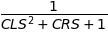

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t = sym.symbols('t', real=True)
S = sym.symbols('S', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
RLC = {R: 10, C: sym.Rational('0.2'), L: sym.Rational('0.8')}

H = 1/((L*C*S**2)+R*C*S+1)
H


#1.Impulso
$x(t) = \delta(t)$

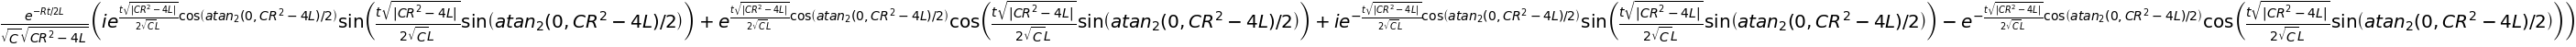

In [ ]:
sym.inverse_laplace_transform(H, S, t)

(I*exp(t*cos(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L))*sin(t*sin(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L)) + exp(t*cos(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L))*cos(t*sin(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L)) + I*exp(-t*cos(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L))*sin(t*sin(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L)) - exp(-t*cos(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L))*cos(t*sin(atan2(0, C*R**2 - 4*L)/2)*sqrt(Abs(C*R**2 - 4*L))/(2*sqrt(C)*L)))*exp(-R*t/(2*L))/(sqrt(C)*sqrt(C*R**2 - 4*L))


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


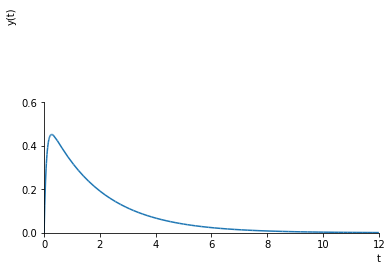

In [ ]:
y= sym.inverse_laplace_transform(H, S, t)

sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');


#2. Escalón unitario
$x(t) = u(t)$

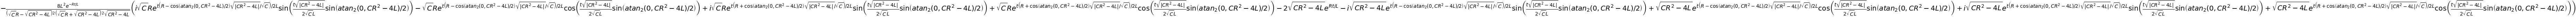

In [ ]:
sym.inverse_laplace_transform(H*(1/S), S, t)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


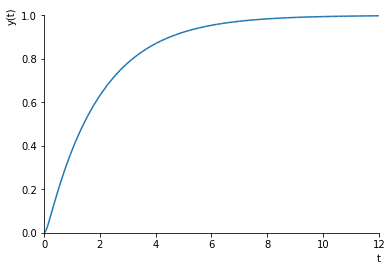

In [ ]:
y= sym.inverse_laplace_transform(H*(1/S), S, t)
sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');


#3. Rampa
$x(t)=t$


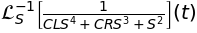

In [ ]:
sym.inverse_laplace_transform(H*1/S**2, S, t)

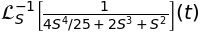

In [ ]:
y= sym.inverse_laplace_transform(H*(1/S**2), S, t)
y= y.subs(RLC)
y
#sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');


#Circuito RCL en paralelo:


In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t = sym.symbols('t', real=True)
S = sym.symbols('S', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
RLC = {R: 10, C: sym.Rational('0.2'), L: sym.Rational('0.8')}

H = 1/(L*S)
H

#1.Impulso
$x(t) = \delta(t)$

In [ ]:
sym.inverse_laplace_transform(H, S, t)

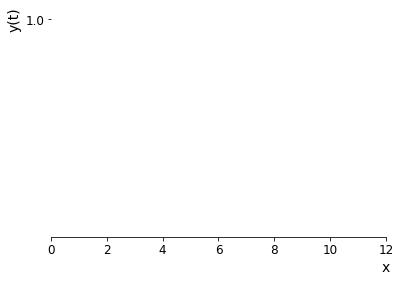

In [ ]:
y=sym.inverse_laplace_transform(H, S, t)
sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');


#2. Escalón unitario
$x(t) = u(t)$

In [ ]:
sym.inverse_laplace_transform(H*(1/S), S, t)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


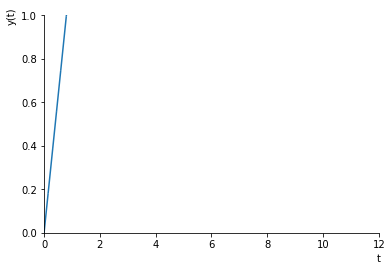

In [ ]:
y= sym.inverse_laplace_transform(H*(1/S), S, t)
sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');


#3. Rampa
$x(t)=t$

In [ ]:
sym.inverse_laplace_transform(H*(1/S**2), S, t)

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


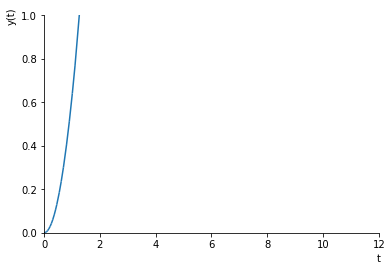

In [ ]:
y= sym.inverse_laplace_transform(H*(1/S**2), S, t)
sym.plot(y.subs(RLC), (t,0,12), ylabel=r'y(t)');



$3.5$ Consulte en que consiste un sistema subamortiguado, sobreamortiguado,
y de amortiguamiento crítico. Genere simulaciones
para ejemplificar cada uno de los casos con los sistemas
R,L,C serie y paralelo estudiados. Nota: asuma condiciones
iniciales cero.


Text(0, 0.5, 'y(t)')

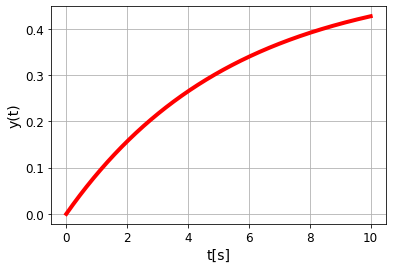

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 20 
Fs = 1000 
Nm = T*Fs 
tv = np.linspace(0,T/2,Nm)

L=8*(10**(-7))
C=0.1*(10**(-7))
R=15
k=1
wn= (1/L*C)**(1/2)
zeta= (R/2)*((C/L)**(1/2))
wd= (1/L*C *(1-(R**2)/4)*C/L)**(1/2)
#Caso 1 subamortiguado 0<zeta<1
yt= 1- (np.exp(-zeta*wn*tv)/(1-zeta**2)**(1/2))*np.sin(wd*tv+ np.arctan((1-zeta**2)**(1/2)/zeta))


plt.plot(tv,yt,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("y(t)",fontsize = 14)


Text(0, 0.5, 'y(t)')

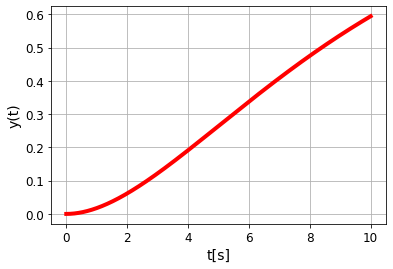

In [ ]:
#Caso 2 amortiguamiento critico zeta=1
L=10*(10**(-7))
C=0.4*(10**(-7))
R=10
k=1
wn= (1/L*C)**(1/2)
zeta= (R/2)*((C/L)**(1/2))
wd= (1/L*C *(1-(R**2)/4)*C/L)**(1/2)

yt= 1- np.exp(-wn*tv)*(1+wn*tv)

plt.plot(tv,yt,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("y(t)",fontsize = 14)


Text(0, 0.5, 'y(t)')

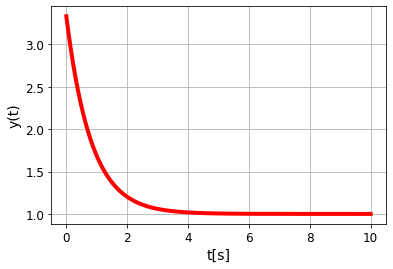

In [ ]:
#Caso 3 sobreamortiguado zeta>1
L=15*(10**(-7))
C=2*(10**(-7))
R=10
k=1
wn= (1/L*C)**(1/2)
zeta= (R/2)*((C/L)**(1/2))
wd= (1/L*C *(1-(R**2)/4)*C/L)**(1/2)

yt= 1+ (1/2*((zeta**2 -1)**(1/2))*(zeta+(zeta**2 -1)**(1/2)) )*np.exp(-(zeta+(zeta**2 -1)**(1/2))*wn*tv)- (1/2*((zeta**2 -1)**(1/2))*(zeta-(zeta**2 -1)**(1/2)) )*np.exp(-(zeta+(zeta**2 -1)**(1/2))*wn*tv)

plt.plot(tv,yt,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("y(t)",fontsize = 14)

la respuesta natural depende de los valores del factor de amortiguamiento y frecuencia de resonancia.

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sympy import exp, sin,cos
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

t = sym.symbols('t', real=True)
R, L, C = sym.symbols(' R L C', positive=True)
L=8*(10**(-7))
C=0.1*(10**(-7))
R=15
k=1
wn= (1/L*C)**(1/2)
zeta= R/(L*C)**(1/2)
#zeta= 1/(2*R*C)
#zeta= (R/2)*((C/L)**(1/2))
wd= (wn**2 - zeta**2)**(1/2)
s1= -zeta+(wn**2 - zeta**2)**(1/2)
#s1= -1/(2*R*C) + ((1/(2*R*C))**2 - 1/(L*C))**(1/2)
s2= -zeta-(wn**2 - zeta**2)**(1/2)
#s2= -1/(2*R*C) - ((1/(2*R*C))**2 - 1/(L*C))**(1/2)
#Caso 1 subamortiguado 0<zeta<1
A1= 4
A2=2
B1=1
B2=2
D1= 1
D2= 2
exponencial= -zeta*t
angulo= wd*t
euler= exp(exponencial)
seno= sin(angulo)
coseno= cos(angulo)
#yt= B1*euler*coseno+ B2*euler*seno
#yt= D1*t*np.exp(-zeta*t)+ D2*np.exp(-zeta*t)



In [ ]:
#yt= A1*exp(s1*t)+ A2*exp(s2*t)

yt= B1*euler*coseno+B2*euler*seno
yt
#sym.plot(yt, (t,-2,0), ylabel=r'y(t)');
